In [25]:
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
from jax import vmap
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
from hiermodelutils import get_logdensities_and_transforms_from_numpyro
from multimodal_examples import (
    dual_moon_model_numpyro,
    eval_numpyro_model
)

# set seaborn style
sns.set(style="white")

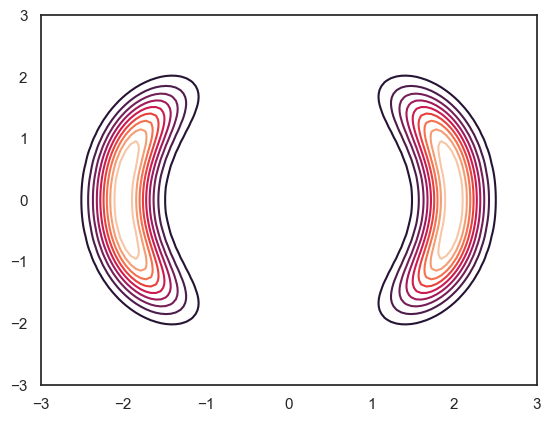

In [26]:
# Set up dual moon model
dual_moon_dist_info = get_logdensities_and_transforms_from_numpyro(dual_moon_model_numpyro)

def dual_moon_logdensity(x: jnp.array) -> float:
    params = {'x': x}
    return dual_moon_dist_info.logdensity_fn(params)

# make a grid of points
x_ = jnp.linspace(-3, 3, 100)
y_ = jnp.linspace(-3, 3, 100)
X, Y = jnp.meshgrid(x_, y_)
x = jnp.stack([X.ravel(), Y.ravel()], axis=-1)
logp = vmap(dual_moon_logdensity)(x)
logP = logp.reshape(X.shape)

fig, ax = plt.subplots()
ax.contour(X, Y, jnp.exp(logP), levels=10);